<a href="https://colab.research.google.com/github/sravani919/AI_Tutor_Interactive_learning/blob/main/Updated_AI_Tutor_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preview of the dataset:
            Timestamp               Email Address           Full Name   \
0  5/14/2025 18:33:58       lpeddar@g.clemson.edu  Likitha Peddareddy    
1  5/14/2025 18:34:58   shreyashdhumale@gmail.com     Shreyash Dhumale   
2  5/14/2025 18:49:56    yernenianvitha@gmail.com      Anvitha Yerneni   
3  5/14/2025 19:02:20       bmarath@g.clemson.edu     Bhushan Marathe    
4  5/14/2025 19:27:43  apurva.patil1723@gmail.com         Apurva Patil   

              Email Address.1 What best describes your current role?    \
0       lpeddar@g.Clemson.edu                                  Student   
1         ssdhuma@clemson.edu                                   Alumni   
2       ayernen@g.clemson.edu                                  Student   
3       bmarath@g.clemson.edu                     Professional learner   
4  apurva.patil1723@gmail.com                     Working Professional   

  How did you access the AI Tutor?    \
0                           Browser    
1     

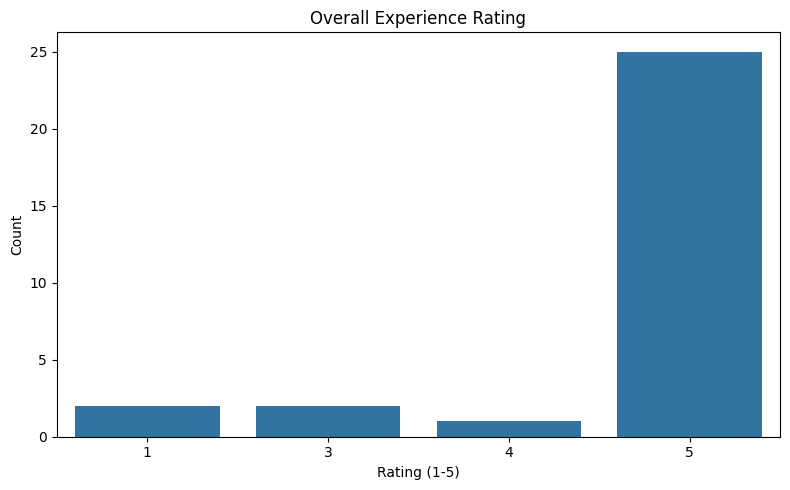

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/AI Tutor Experience Feedback  (Responses) - Form Responses 1.csv'
df = pd.read_csv(file_path)

# Preview the first few rows
print("Preview of the dataset:")
print(df.head())

# Drop duplicate email column if present
df = df.loc[:, ~df.columns.duplicated()]

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Basic summary
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Optional: Plotting experience rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='How would you rate your overall experience with the AI Tutor?')
plt.title('Overall Experience Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


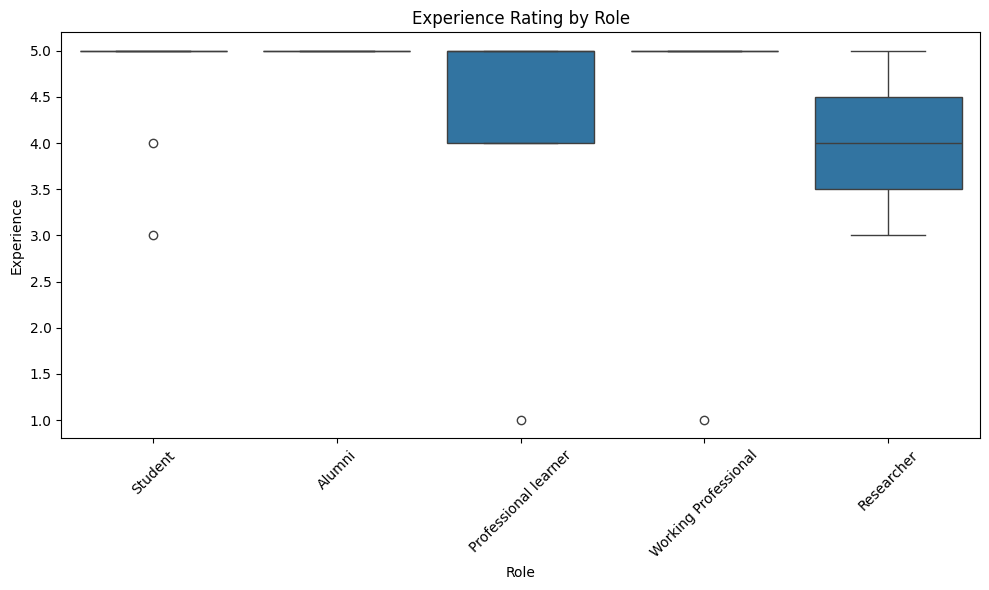

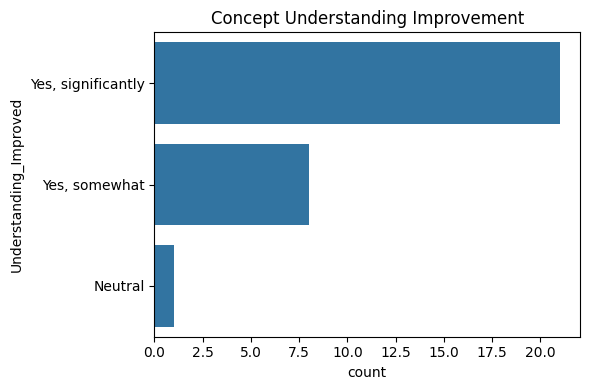

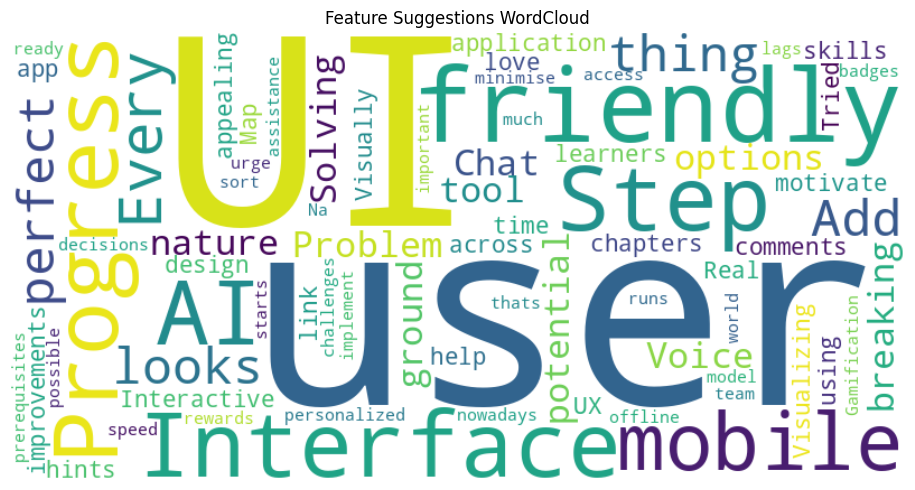

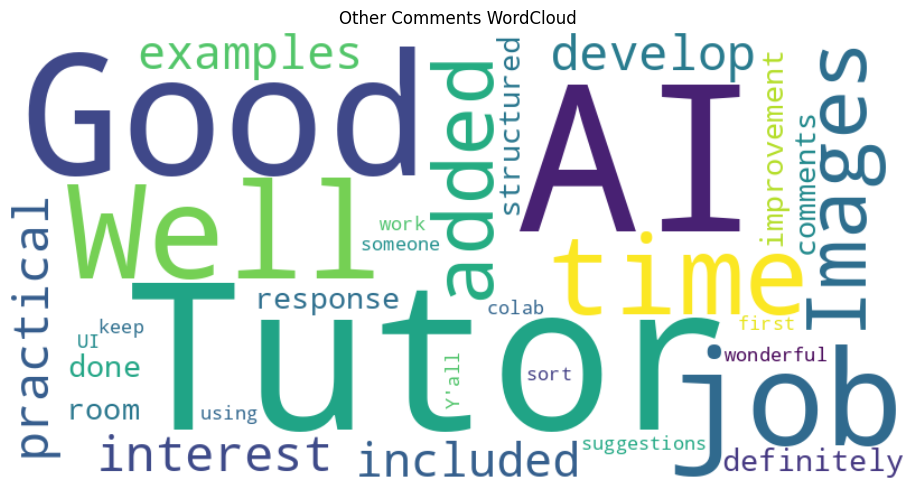

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = '/AI Tutor Experience Feedback  (Responses) - Form Responses 1.csv'
df = pd.read_csv(file_path)

# Rename columns for easier access
df.columns = [col.strip() for col in df.columns]
df.rename(columns={
    'What best describes your current role?': 'Role',
    'How would you rate your overall experience with the AI Tutor?': 'Experience',
    'How easy was it to use the AI Tutor interface?': 'Ease_of_Use',
    'How helpful were the guided walkthroughs in getting started?': 'Walkthrough_Helpful',
    'How engaging did you find the different learning modes (Business Case, Storytelling, Challenges.)?': 'Engagement',
    'Which challenge types did you try?': 'Challenges_Tried',
    'Which challenge type was the most effective for your learning? Why?': 'Most_Effective_Challenge',
    'Was the feedback (XP, correct/incorrect answers, progress tracking) helpful in understanding your performance?': 'Feedback_Helpful',
    'How would you rate the quality and clarity of the content presented in the AI Tutor?': 'Content_Clarity',
    'Did the AI Tutor help improve your understanding of the concepts?': 'Understanding_Improved',
    'How would you describe the speed and performance of the AI Tutor in Google Colab?': 'Speed_Performance',
    'What features would you like to see added in the future?': 'Feature_Suggestions',
    'Would you use the AI Tutor again if it were available as a public website?': 'Reuse',
    'Any other comments or suggestions to improve the AI Tutor?': 'Other_Comments'
}, inplace=True)

# --- Plot 1: Experience by Role ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Role', y='Experience', data=df)
plt.title('Experience Rating by Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Understanding Improvement ---
plt.figure(figsize=(6, 4))
sns.countplot(y='Understanding_Improved', data=df)
plt.title('Concept Understanding Improvement')
plt.tight_layout()
plt.show()

# --- Plot 3: Feature Suggestions WordCloud ---
feature_text = " ".join(df['Feature_Suggestions'].dropna().astype(str))
feature_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feature_text)

plt.figure(figsize=(10, 5))
plt.imshow(feature_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Feature Suggestions WordCloud')
plt.tight_layout()
plt.show()

# --- Plot 4: Other Comments WordCloud ---
comments_text = " ".join(df['Other_Comments'].dropna().astype(str))
comments_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(comments_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Other Comments WordCloud')
plt.tight_layout()
plt.show()


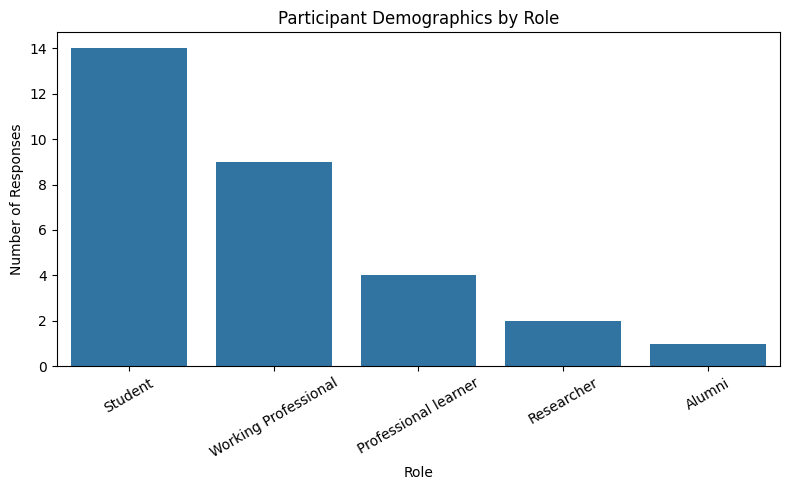

In [3]:
# Bar plot for participant roles
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Role', order=df['Role'].value_counts().index)
plt.title('Participant Demographics by Role')
plt.ylabel('Number of Responses')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [4]:
rating_cols = ['Experience', 'Ease_of_Use', 'Walkthrough_Helpful', 'Engagement', 'Content_Clarity']
df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')

df[rating_cols].describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
Experience,4.566667,1.104328,1.0,5.0
Ease_of_Use,4.433333,1.135124,1.0,5.0
Walkthrough_Helpful,4.566667,1.072648,1.0,5.0
Engagement,4.666667,0.546672,3.0,5.0
Content_Clarity,4.566667,0.626062,3.0,5.0


In [5]:
# How many users answered all critical sections?
df['answered_most'] = df[['Experience', 'Ease_of_Use', 'Understanding_Improved', 'Feedback_Helpful']].notna().sum(axis=1)
print(df['answered_most'].value_counts().sort_index())


answered_most
3     1
4    29
Name: count, dtype: int64


In [7]:
reuse_rate = df['Reuse'].value_counts(normalize=True).round(2) * 100
print(reuse_rate)


Reuse
Yes      96.0
Maybe     4.0
Name: proportion, dtype: float64


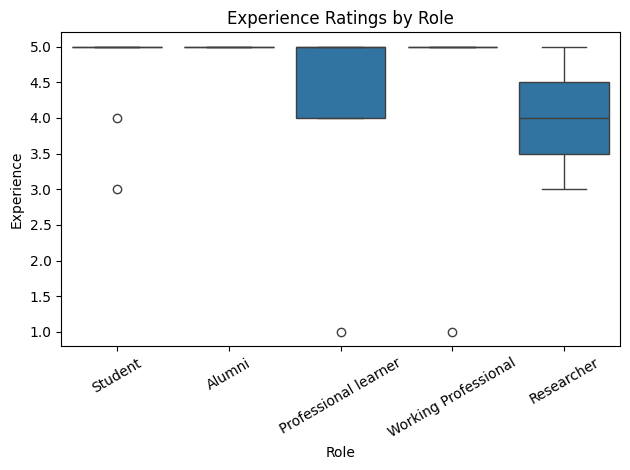

In [8]:
sns.boxplot(x='Role', y='Experience', data=df)
plt.title('Experience Ratings by Role')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [9]:
open_cols = ['Feature_Suggestions', 'Other_Comments']
response_rate = df[open_cols].notna().any(axis=1).mean()
print(f"Open-ended feedback response rate: {response_rate:.2%}")


Open-ended feedback response rate: 46.67%
